In [8]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In the next cell we have a standard data loading function.

In [9]:
# load the data
def load_data():
    # load data
    data = np.matrix(np.genfromtxt('4class_data.csv', delimiter=','))
    x = np.asarray(data[:,0:-1])
    y = np.asarray(data[:,-1])
    y.shape = (np.size(y),1)
    return x,y

Next we have all of the functions required for gradient descent functionality - a function to calcualte current cost value, gradient, and the gradient descent with **fixed step length** loop itself.

In [10]:
# calculate the cost value of the softmax multiclass cost for a given input weight W=[w_1,...,w_C]
def calculate_cost(X,y,W):
    # define limits
    P = len(y)
    C = len(np.unique(y))
    
    # loop for cost function
    cost = 0
    for p in range(0,P):
        p_c = int(y[p])-1
        temp = 0
        
        # produce innner sum
        for j in range(0,C):
            temp += np.exp(np.dot(X[:,p].T,(W[:,j] - W[:,p_c])))

        # update outer sum 
        cost+=np.log(temp)
    return cost

# compute mini gradient
def compute_mini_grad(x_p,y_p,W,c,C):
    # produce gradient for each class weights
    temp = 0
    for j in range(0,C):
        temp+=np.exp(np.dot(x_p.T,W[:,j] - W[:,c]))
    temp = (np.divide(1,temp) - int(y_p == (c+1)))*x_p
    
    return temp

# learn all C separators running gradient descent
def gradient_descent_fixed_step(x,y):
    # formulate full input data matrix X
    temp = np.shape(x)  
    temp = np.ones((temp[0],1))
    X = np.concatenate((temp,x),1)
    X = X.T
    
    # initialize variables
    C = len(np.unique(y))
    N,P = np.shape(X)
    W = np.random.randn(N,C)
    
    # compute conservatively optimal fixed step length
    L = 0.25*C*np.linalg.norm(X,2)**2
    alpha = 1/L
    
    # record number of misclassifications on training set at each epoch 
    cost_history = []

    # outer descent loop
    max_its = 100
    for k in range(max_its):
        grad = np.zeros((np.shape(W)))

        # take stochastic step in pth point
        for p in range(0,P):
            # re-initialize full gradient with zeros
            temp_grad = np.zeros((np.shape(W)))
        
            # update each classifier's weights on pth point
            for c in range(0,C):
                # compute cth class gradient in pth point
                x_p = X[:,p]
                y_p = y[p]
                temp = compute_mini_grad(x_p,y_p,W,c,C)
                temp_grad[:,c] += temp.ravel()
                
            # update gradient
            grad += temp_grad
        
        # take stochastic gradient step in all weights
        W = W - alpha*grad

        # update misclass container and associated best W
        current_cost = calculate_cost(X,y,W)
        cost_history.append(current_cost)
    
    # return goodies
    return cost_history

In the next cell we have all of the functions required for gradient descent functionality - a function to calcualte current cost value, gradient, and the gradient descent with **adaptive step length** loop itself.

In [11]:
# calculate the cost function value of the softmax multiclass cost for a given input weight W=[w_1,...,w_C]
def calculate_cost(X,y,W):
    # define limits
    P = len(y)
    C = len(np.unique(y))
    
    # loop for cost function
    cost = 0
    for p in range(0,P):
        p_c = int(y[p])-1
        temp = 0
        
        # produce innner sum
        for j in range(0,C):
            temp += np.exp(np.dot(X[:,p].T,(W[:,j] - W[:,p_c])))

        # update outer sum 
        cost+=np.log(temp)
    return cost

# compute mini gradient
def compute_mini_grad(x_p,y_p,W,c,C):
    # produce gradient for each class weights
    temp = 0
    for j in range(0,C):
        temp+=np.exp(np.dot(x_p.T,W[:,j] - W[:,c]))
    temp = (np.divide(1,temp) - int(y_p == (c+1)))*x_p
    
    return temp

# learn all C separators running gradient descent
def gradient_descent_line_search(x,y):
    # formulate full input data matrix X
    temp = np.shape(x)  
    temp = np.ones((temp[0],1))
    X = np.concatenate((temp,x),1)
    X = X.T
    
    # initialize variables
    C = len(np.unique(y))
    N,P = np.shape(X)
    W = np.random.randn(N,C)
    
    # record number of misclassifications on training set at each epoch 
    cost_history = []

    # outer descent loop
    max_its = 100
    for k in range(max_its):
        grad = np.zeros((np.shape(W)))

        # take stochastic step in pth point
        for p in range(0,P):
            # re-initialize full gradient with zeros
            temp_grad = np.zeros((np.shape(W)))
        
            # update each classifier's weights on pth point
            for c in range(0,C):
                # compute cth class gradient in pth point
                x_p = X[:,p]
                y_p = y[p]
                temp = compute_mini_grad(x_p,y_p,W,c,C)
                temp_grad[:,c] += temp.ravel()
                
            # update gradient
            grad += temp_grad
        
        # perform line search for step length tuning
        alpha = line_search(X,y,W,grad)
        
        # take gradient step in all weights
        W = W - alpha*grad

        # update misclass container and associated best W
        current_cost = calculate_cost(X,y,W)
        cost_history.append(current_cost)
    
    # return goodies
    return cost_history

# line search module
def line_search(X,y,W,grad):
    alpha = 1
    t = 0.5
    g_w = calculate_cost(X,y,W)
    norm_w = np.linalg.norm(grad)**2
    while calculate_cost(X,y,W - alpha*grad) > g_w - alpha*0.5*norm_w:
        alpha = t*alpha
    return alpha

Now that we have defined all of the necessary pieces, lets run everything and plot the results.

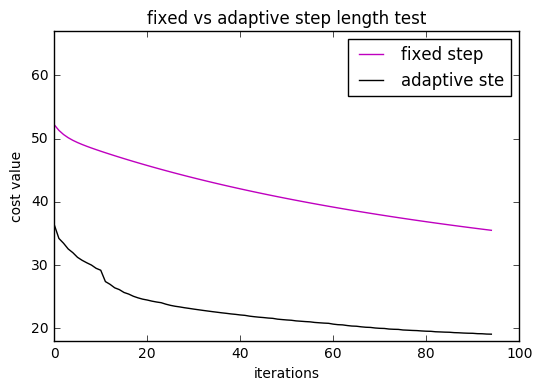

In [12]:
# load data
x,y = load_data()

# perform gradient descent on softmax multiclass
cost_history_fixed = gradient_descent_fixed_step(x,y)           
cost_history_adaptive = gradient_descent_line_search(x,y)  

# plot both runs
plt.plot(cost_history_fixed[5:],color = 'm')
plt.plot(cost_history_adaptive[5:],'k')

# clean up plot
plt.ylim([min(min(cost_history_fixed),min(cost_history_adaptive)) - 1,max(max(cost_history_fixed),max(cost_history_adaptive)) + 1])
plt.xlabel('iterations')
plt.ylabel('cost value')
plt.legend(['fixed step','adaptive ste'])
plt.title('fixed vs adaptive step length test')
plt.show()